<a href="https://colab.research.google.com/github/Codeginner/machineLearning-task/blob/main/6th%20Week%20Tasks/K-Means%20Clustering%20menggunakan%20google%20colab%20dengan%20Mall_Customers.csv/kmeans_clustering_mall_customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gilman Muslih Z

1103201075

In [ ]:
from google.colab import drive # import drive ke dalam environment google colab
import pandas as pd # import pandas sebagai pd untuk melakukan pengolahan data

# mount google drive untuk mengakses dataset yang ada di google drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# memasukan path dataset ke dalam variabel "fp"
fp = '/content/drive/MyDrive/Dataset/Mall_Customers.csv'

# enggunakan Pandas untuk membaca dataset CSV yang terletak di path yang disimpan dalam variabel "fp"
df = pd.read_csv(fp)

# menampilkan lima baris pertama dari dataset untuk melihat contoh data
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# Mengubah nama atribut/kolom
df = df.rename(columns={'Annual Income (k$)': 'Annual Income', 'Spending Score (1-100)': 'Spending Score'})

# Menampilkan DataFrame setelah mengubah nama atribut
print(df)

     CustomerID  Gender  Age  Annual Income  Spending Score
0             1    Male   19             15              39
1             2    Male   21             15              81
2             3  Female   20             16               6
3             4  Female   23             16              77
4             5  Female   31             17              40
..          ...     ...  ...            ...             ...
195         196  Female   35            120              79
196         197  Female   45            126              28
197         198    Male   32            126              74
198         199    Male   32            137              18
199         200    Male   30            137              83

[200 rows x 5 columns]


In [ ]:
# Menghapus kolom "CustomerID" dan "Gender"
df = df.drop(columns=['CustomerID', 'Gender'])

# Menampilkan DataFrame setelah menghapus kolom
print(df)


     Age  Annual Income  Spending Score
0     19             15              39
1     21             15              81
2     20             16               6
3     23             16              77
4     31             17              40
..   ...            ...             ...
195   35            120              79
196   45            126              28
197   32            126              74
198   32            137              18
199   30            137              83

[200 rows x 3 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

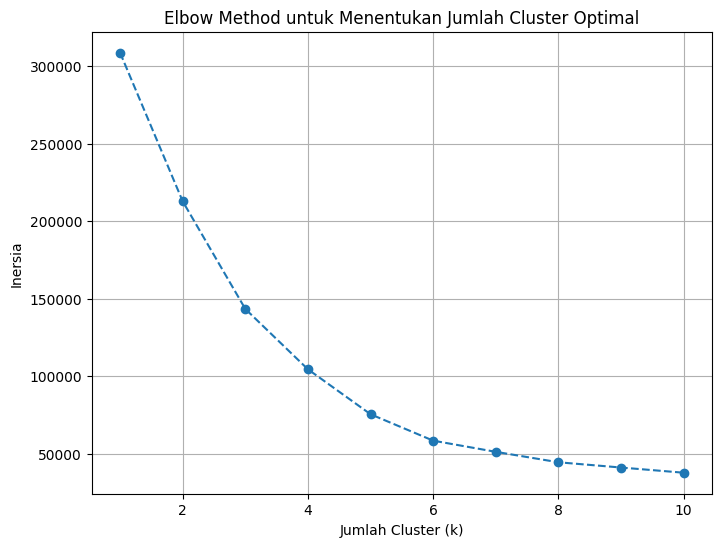

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans # import modul KMeans  untuk mengimplementasikan algoritma K-Means Clustering

# Pilih kolom yang akan digunakan dalam analisis klaster
data = df[['Age', 'Annual Income', 'Spending Score']]

# Inisialisasi list untuk menyimpan nilai inersia
inertia = []

# Lakukan analisis klaster dengan k dari 1 hingga 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

# Visualisasi elbow method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inersia')
plt.title('Elbow Method untuk Menentukan Jumlah Cluster Optimal')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


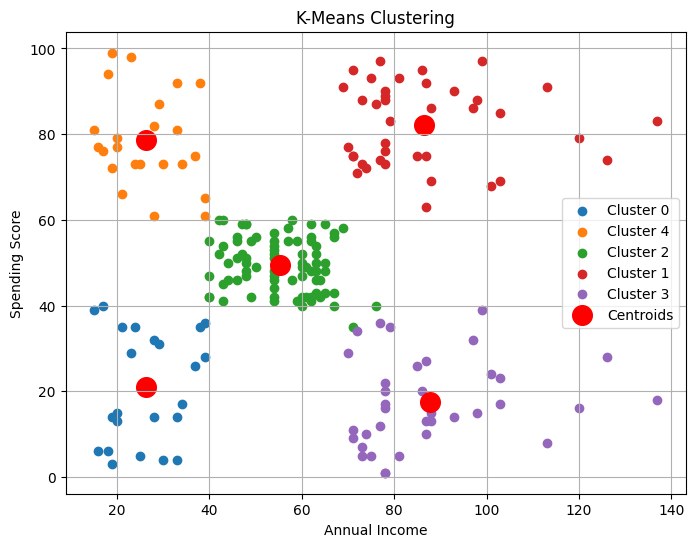

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Pilih kolom yang akan digunakan dalam analisis klaster
data = df[['Age', 'Annual Income', 'Spending Score']]

# Membuat model K-Means Clustering dengan jumlah cluster=5
kmeans = KMeans(n_clusters=5, random_state=0)
df['label'] = kmeans.fit_predict(data)

# Visualisasi berdasarkan label
plt.figure(figsize=(8, 6))

# Visualisasi klaster
for label in df['label'].unique():
    plt.scatter(data[df['label'] == label]['Annual Income'], data[df['label'] == label]['Spending Score'], label=f'Cluster {label}')

plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=200, c='red', label='Centroids')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('K-Means Clustering')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


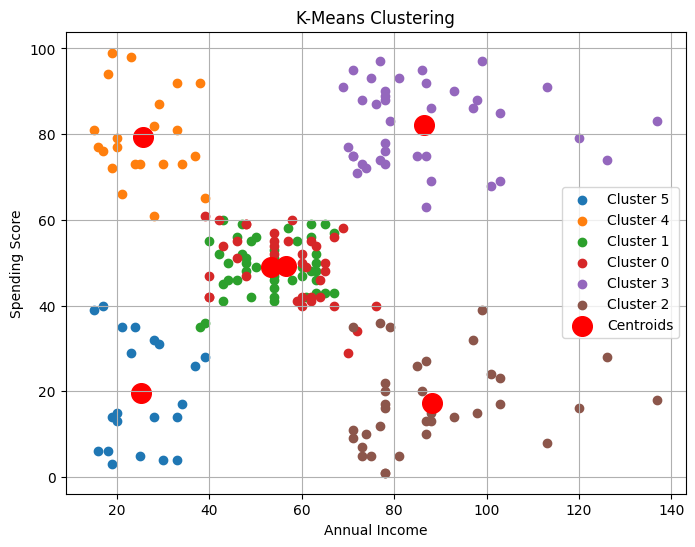

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Pilih kolom yang akan digunakan dalam analisis klaster
data = df[['Age', 'Annual Income', 'Spending Score']]

# Membuat model K-Means Clustering dengan jumlah cluster=5
kmeans = KMeans(n_clusters=6, random_state=0)
df['label'] = kmeans.fit_predict(data)

# Visualisasi berdasarkan label
plt.figure(figsize=(8, 6))

# Visualisasi klaster
for label in df['label'].unique():
    plt.scatter(data[df['label'] == label]['Annual Income'], data[df['label'] == label]['Spending Score'], label=f'Cluster {label}')

plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=200, c='red', label='Centroids')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('K-Means Clustering')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Silhouette Score untuk k=2: 0.2932
Silhouette Score untuk k=3: 0.3839
Silhouette Score untuk k=4: 0.4055
Silhouette Score untuk k=5: 0.4443
Silhouette Score untuk k=6: 0.4523
Silhouette Score untuk k=7: 0.4413
Silhouette Score untuk k=8: 0.4281
Silhouette Score untuk k=9: 0.4013
Silhouette Score untuk k=10: 0.3791


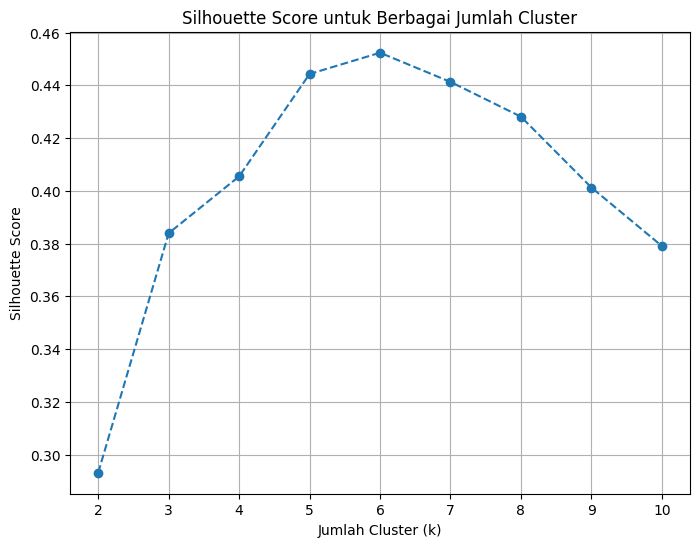

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Pilih kolom yang akan digunakan dalam analisis klaster
data = df[['Age', 'Annual Income', 'Spending Score']]

# Inisialisasi list untuk menyimpan nilai Silhouette Score
silhouette_scores = []

# Menghitung Silhouette Score untuk k dari 2 hingga 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(data)
    silhouette_avg = silhouette_score(data, labels)
    silhouette_scores.append(silhouette_avg)

# Menampilkan hasil Silhouette Score
for k, score in zip(range(2, 11), silhouette_scores):
    print(f"Silhouette Score untuk k={k}: {score:.4f}")

# Visualisasi Silhouette Score
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score untuk Berbagai Jumlah Cluster')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Davies-Bouldin Index untuk k=2: 1.3571
Davies-Bouldin Index untuk k=3: 0.8748
Davies-Bouldin Index untuk k=4: 0.8915
Davies-Bouldin Index untuk k=5: 0.8219
Davies-Bouldin Index untuk k=6: 0.7470
Davies-Bouldin Index untuk k=7: 0.7864
Davies-Bouldin Index untuk k=8: 0.8641
Davies-Bouldin Index untuk k=9: 0.9070
Davies-Bouldin Index untuk k=10: 0.9574


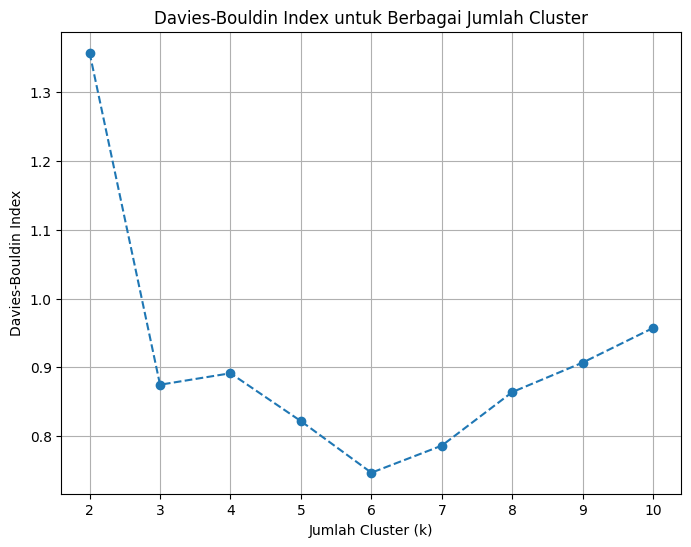

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score # import metode davies_bouldin_score untuk mengukur nilai Davies-Bouldin untuk hasil klastering

# Pilih kolom yang akan digunakan dalam analisis klaster
data = df[['Age', 'Annual Income', 'Spending Score']]

# Inisialisasi list untuk menyimpan nilai Davies-Bouldin Index
dbi_scores = []

# Menghitung Davies-Bouldin Index untuk k dari 2 hingga 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(data)
    dbi = davies_bouldin_score(data, labels)
    dbi_scores.append(dbi)

# Menampilkan hasil Davies-Bouldin Index
for k, score in zip(range(2, 11), dbi_scores):
    print(f"Davies-Bouldin Index untuk k={k}: {score:.4f}")

# Visualisasi Davies-Bouldin Index
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), dbi_scores, marker='o', linestyle='--')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index untuk Berbagai Jumlah Cluster')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Calinski-Harabasz Index untuk k=2: 89.2810
Calinski-Harabasz Index untuk k=3: 113.7051
Calinski-Harabasz Index untuk k=4: 127.9838
Calinski-Harabasz Index untuk k=5: 151.0439
Calinski-Harabasz Index untuk k=6: 166.7205
Calinski-Harabasz Index untuk k=7: 162.2852
Calinski-Harabasz Index untuk k=8: 163.5806
Calinski-Harabasz Index untuk k=9: 156.1551
Calinski-Harabasz Index untuk k=10: 152.2643


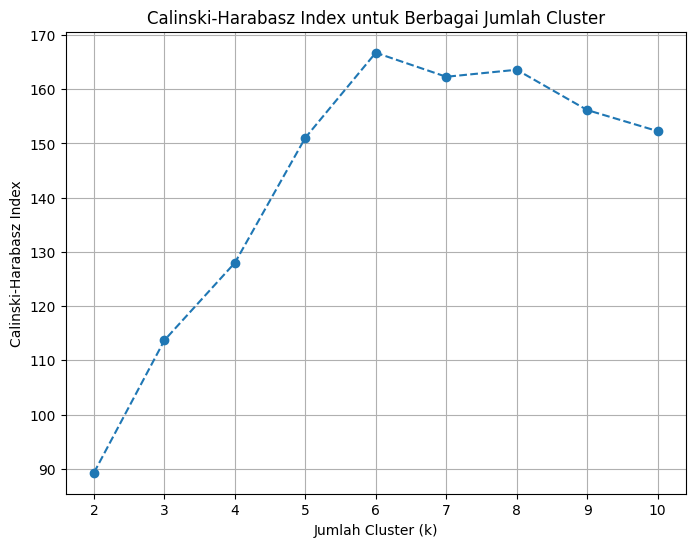

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score # import metode calinski_harabasz_score dari Scikit-learn untuk mengukur nilai Calinski-Harabasz untuk hasil klastering

# Pilih kolom yang akan digunakan dalam analisis klaster
data = df[['Age', 'Annual Income', 'Spending Score']]

# Inisialisasi list untuk menyimpan nilai Calinski-Harabasz Index
ch_scores = []

# Menghitung Calinski-Harabasz Index untuk k dari 2 hingga 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(data)
    ch = calinski_harabasz_score(data, labels)
    ch_scores.append(ch)

# Menampilkan hasil Calinski-Harabasz Index
for k, score in zip(range(2, 11), ch_scores):
    print(f"Calinski-Harabasz Index untuk k={k}: {score:.4f}")

# Visualisasi Calinski-Harabasz Index
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), ch_scores, marker='o', linestyle='--')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Calinski-Harabasz Index')
plt.title('Calinski-Harabasz Index untuk Berbagai Jumlah Cluster')
plt.grid(True)
plt.show()
